In [1]:
###################################################################################################
# This script takes data from a database produced in 01_MakeAddressDatabase.ipynb and plots 
# satellite maps of each residence to be input into the neural network to see which roofs have 
# solar panels.
###################################################################################################
%matplotlib inline

import urllib, StringIO
from PIL import Image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import googlemaps # from https://github.com/googlemaps/google-maps-services-python, installed using "pip install -U googlemaps"

In [2]:
path='/Users/brianna/Dropbox/Insight/solar/'

########################################################
############ TBD: write code to grab lat,lon coordinates 
############ of residences from the database so we can
############ pop through and download all of the images.
########################################################



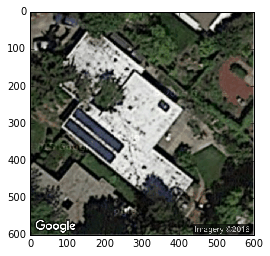

In [4]:
# Input the parameters that we need, they're all listed and illustrated on:
# https://developers.google.com/maps/documentation/static-maps/
# to change the map type to satellite, check this page:
# https://developers.google.com/maps/documentation/javascript/maptypes?hl=en

lat=37.432062
lon=-122.115734

sizex=300
sizey=300
zoom = 20
scale=2

#MapImgageURL = "https://maps.googleapis.com/maps/api/staticmap?maptype=satellite&center=%s,%s&scale=%s&zoom=%i&size=%sx%s&sensor=false" % (GeocodeLat, GeocodeLng, scale, zoom, sizex, sizey)

#print(MapImgageURL)

gurl="https://maps.googleapis.com/maps/api/staticmap?"
MapImgageURL = "{gurl}maptype=satellite&center={lat},{lon}&scale={scale}&zoom={zoom}&size={sizex}x{sizey}&sensor=false".format(
    gurl=gurl,lat=lat, lon=lon, scale=scale, zoom=zoom, sizex=sizex, sizey=sizey)


#print(MapImgageURL)
mapname=path+'sat_maps/'+str(lat)+'_'+str(lon)+'_z'+str(zoom)+'_sc'+str(scale)+'_si'+str(sizex)+'.png'
MapImageReturn = urllib.urlretrieve(MapImgageURL, mapname)[0]
GMImageArray = mpimg.imread(MapImageReturn)

# use pyplot version instead of the pylab version since Victor understands it better.
plt.imshow(GMImageArray, interpolation='none')